In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def u(t, x):
    if (t < x):
        return 0
    if (t >= x):
        return 1

In [3]:
def answer(Nx, Nt):
    u_exact = []
    for i in range(Nt+1):
       u_exact.append([0]*(Nx+1))

    t = np.linspace(0, 1, Nt+1)
    x = np.linspace(0, 1, Nx+1)

    for i in range(Nt+1):
        for j in range(Nx+1):
            u_exact[i][j] = u(t[i], x[j])
            
    for j in range(Nx+1):
        u_exact[0][j] = 0
        u_exact[Nt][j] = 1
        
    for i in range(Nt+1):
        u_exact[i][0] = 1
        u_exact[i][Nx] = 0

    return u_exact

In [4]:
#первый метод

In [5]:
def First(Nx, Nt):
    t = np.linspace(0, 1, Nt+1)
    tau = 1/Nt
    x = np.linspace(0, 1, Nx+1)
    h = 1/Nx
    
    u = []
    for i in range(Nt+1):
       u.append([0]*(Nx+1))

    for j in range(Nx+1):
        u[0][j] = 0
        u[Nt][j] = 1
        
    for i in range(Nt+1):
        u[i][0] = 1
        u[i][Nx] = 0

    for time in range(1, Nt):
        A = 0
        B = 1/tau
        C = 0
        G = [0]*Nx
        for i in range(Nx):
            G[i] = 1/tau * u[time-1][i] - 1/h * u[time-1][i] + 1/h * u[time-1][i-1]

        # вычисляем прогоночные коэффициенты: 
        P = [0]*Nx
        Q = [0]*Nx
        Q[0] = 1
        for i in range(1, Nx):
            P[i] = -C/(A*P[i-1] + B)
            Q[i] = (G[i] - A*Q[i-1]) / (A*P[i-1] + B)

        # вычисляем u[i]:
        for i in range(Nx-1, 0, -1):
            u[time][i] = P[i]*u[time][i+1] + Q[i]

    return u

In [6]:
def First_result():
  N = [10, 20, 40, 80, 160]
  for i in range(5):
     x = np.linspace(0, 1, N[i]+1)
     u = First(N[i], N[i])[N[i]//2]
     plt.plot(x, u, color='red')
     plt.grid() 

  x = np.linspace(0, 1, 101)
  plt.plot(x, answer(100, 100)[100//2], color='green')
  plt.xlabel('Ось х')
  plt.ylabel('Ось u')
  plt.show()

In [7]:
def First_error():
  N = [10, 20, 40, 80, 160]
  Err = [0]*5
  print('Относительная ошибка метода:')
  print('Сетка Nx/Nt =          Ошибка')
  print('-----------------------------------')
  for n in range(5):
    x = np.linspace(0, 1, N[n]+1)
    u = First(N[n], N[n])
    u_exact = answer(N[n], N[n])
    max_err = 0
    for i in range(N[n]+1):
        for j in range(N[n]+1):
            err = abs(u[i][j]-u_exact[i][j])
            if (err > max_err):
                max_err = err
                #print(i, j, max_err)
    Err[n] = max_err
    print(N[n], N[n], '          ' ,max_err) 
  plt.plot(N, Err, color='red')
  plt.grid() 
  plt.show()

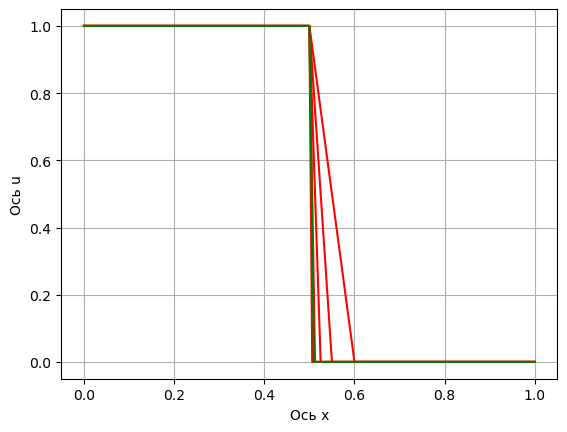

Относительная ошибка метода:
Сетка Nx/Nt =          Ошибка
-----------------------------------
10 10            0
20 20            0
40 40            0
80 80            0
160 160            0


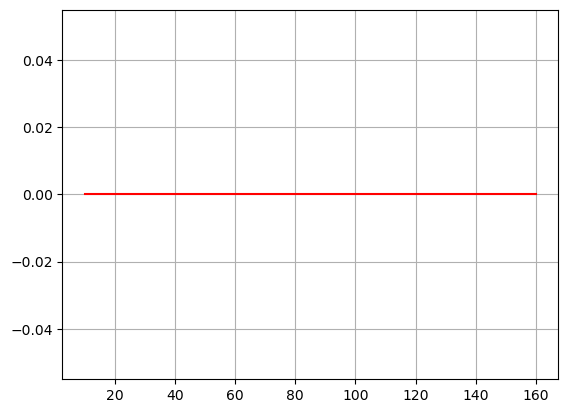

In [11]:
First_result()
First_error()

In [9]:
#второй метод

In [13]:
def Second(Nx, Nt):
    t = np.linspace(0, 1, Nt+1)
    tau = 1/Nt
    x = np.linspace(0, 1, Nx+1)
    h = 1/Nx
    
    u = []
    for i in range(Nt+1):
       u.append([0]*(Nx+1))

    for j in range(Nx+1):
        u[0][j] = 0
        u[Nt][j] = 1
        
    for i in range(Nt+1):
        u[i][0] = 1
        u[i][Nx] = 0

    for time in range(1, Nt):
        A = -1/(2*h)
        B = 1/tau
        C = 1/(2*h)
        G = [0]*Nx
        for i in range(Nx):
            G[i] = 1/tau * u[time-1][i]

        # вычисляем прогоночные коэффициенты: 
        P = [0]*Nx
        Q = [0]*Nx
        Q[0] = 1
        for i in range(1, Nx):
            P[i] = -C/(A*P[i-1] + B)
            Q[i] = (G[i] - A*Q[i-1]) / (A*P[i-1] + B)

        # вычисляем u[i]:
        for i in range(Nx-1, 0, -1):
            u[time][i] = P[i]*u[time][i+1] + Q[i]

    return u


In [14]:
def Second_result():
  N = [10, 20, 40, 80, 160]
  for i in range(5):
     x = np.linspace(0, 1, (N[i]**2)+1)
     u = Second(N[i]**2, N[i])[N[i]//2]
     plt.plot(x, u, color='red')
     plt.grid() 

  x = np.linspace(0, 1, 10001)
  plt.plot(x, answer(100**2, 100)[100//2], color='green')
  plt.xlabel('Ось х')
  plt.ylabel('Ось u')
  plt.show()

In [15]:
def Second_error():
  N = [10, 20, 40, 80, 160]
  Err = [0]*5
  print('Относительная ошибка метода:')
  print('Сетка Nx/Nt =          Ошибка')
  print('-----------------------------------')
  for n in range(5):
    x = np.linspace(0, 1, (N[n]**2)+1)
    u = Second(N[n]**2, N[n])
    u_exact = answer(N[n]**2, N[n])
    max_err = 0
    for i in range(N[n]+1):
        for j in range((N[n]**2)+1):
            err = abs(u[i][j]-u_exact[i][j])
            if (err > max_err):
                max_err = err
    Err[n] = max_err
    print(N[n]**2, N[n], '          ' ,max_err) 
  plt.plot(N, Err, color='red')
  plt.grid() 
  plt.show()

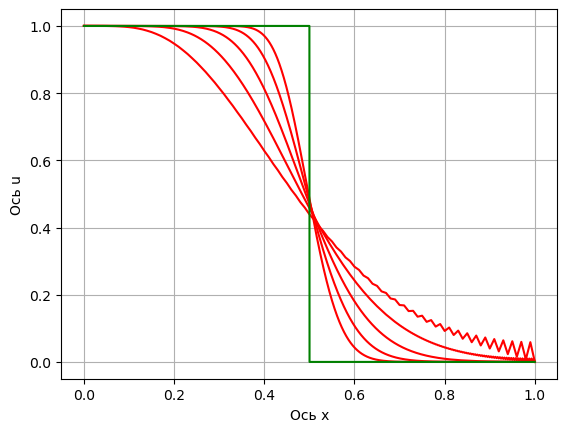

Относительная ошибка метода:
Сетка Nx/Nt =          Ошибка
-----------------------------------
100 10            0.7765132372403646
400 20            0.8322166778032686
1600 40            0.8776890110644232
6400 80            0.9121700965841294
25600 160            0.93741134400926


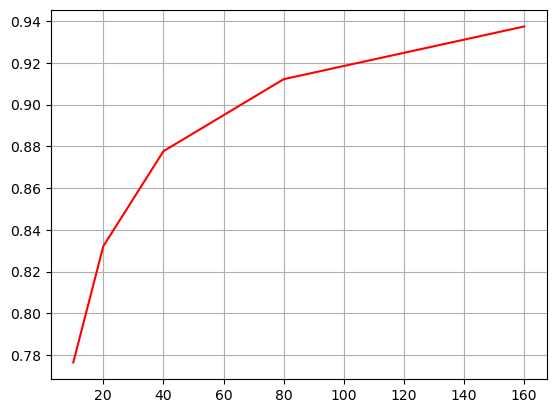

In [20]:
Second_result()
Second_error()